# <center> **Acné level detection with images** </center>


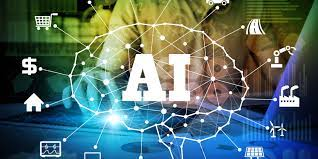


## **Integrantes**
1. Laura Vanesa Mendez Rivera - 2191951
2. Alejandro Nuñez Herrera - 2191947
3. Juan David Morantes Vergara - 2191931



Dataset:
https://www.kaggle.com/datasets/rutviklathiyateksun/acne-grading-classificationdataset

In [ ]:
#@title Librerias y montar el drive
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
import os
from skimage import io
from PIL import Image 
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/a/Ia_Project/"
os.chdir(path) 

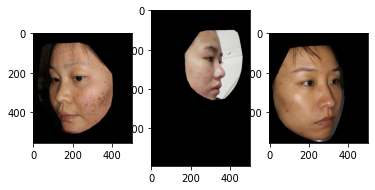

In [ ]:
#@title Mini galeria
image=io.imread("Level_1/levle1_16.jpg")
image2=io.imread("Level_1/levle1_26.jpg")
image3=io.imread("Level_0/levle0_1.jpg")
plt.figure()
plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(image2)
plt.subplot(1,3,3)
plt.imshow(image3)

In [ ]:
#@title Las imagenes son matrices
image2[50:300,50:300,2]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 106, 108, 109],
       [  0,   0,   0, ..., 106, 105, 106],
       [  0,   0,   0, ..., 104, 103, 104]], dtype=uint8)

[]

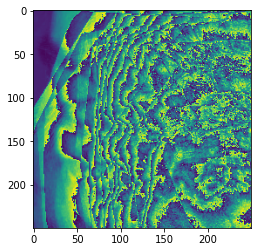

In [ ]:
#@title Promedio de imagenes
lvl0=[]
lvl0.append(os.listdir(path+"/Level_0"))
lvl0=np.array(lvl0)
lvl0.shape
numero = "20" #@param {type:"string"}
n=int(numero)
dimension = "0" #@param {type:"string"}
dimension=int(dimension)
lvl0=lvl0[0,0:n]
resul_lvl0=0
lvl=0
for j in np.nditer(lvl0):
  #print("Level_"+str(lvl) +"/"+str(j))
  image=io.imread("Level_"+str(lvl) +"/"+str(j))
  r=image[50:300,50:300:,dimension]
  resul_lvl0= resul_lvl0+r
resul_lvl0=resul_lvl0/n-1
plt.imshow(resul_lvl0)
plt.plot()

In [ ]:
folders = os.listdir(path)
print(folders)

['Level_0', 'Level_1', 'Level_2', 'Presentacion 1.ipynb']


In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        directory = path,
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        directory = path,
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 1002 images belonging to 3 classes.
Found 1002 images belonging to 3 classes.


In [ ]:
Level_0 = sorted(os.listdir(path + '/Level_0'))
Level_1 = sorted(os.listdir(path + '/Level_1'))
Level_2 = sorted(os.listdir(path + '/Level_2'))
#Cantidad de imágenes que se tienen de cada clase
print("cantidad de imágenes:")
print("Level_0 :",len(Level_0))
print("Level_1 :",len(Level_1))
print("Level_2 :",len(Level_2))

cantidad de imágenes:
Level_0 : 387
Level_1 : 476
Level_2 : 139


In [ ]:
data = [] #X
labels = []#y
#Se realiza el proceso para la primera carpeta (Level_0) y agregamos al label un valor de 0
for k in Level_0:
  img = cv2.imread(path +'/Level_0/'+k) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(0)
#Se realiza el proceso para la primera carpeta (Level_1) y agregamos al label un valor de 0
for l in Level_1:
  img = cv2.imread(path +'/Level_1/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(1)
#Se realiza el proceso para la primera carpeta (Level_2) y agregamos al label un valor de 0
for i in Level_2:
  img = cv2.imread(path +'/Level_2/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (128,128))
  data.append(gris.flatten())
  labels.append(2)



In [ ]:
#@title Se almacenan los archivos en dos arrays que conformaran el dataset y lo normalizamos antes de iterar para que evitar que su costo crezca exponencialmente.
imagenes = np.array(data)
labels = np.array(labels)

imagenes = imagenes.astype(np.float32)
labels = labels.astype(np.int32)
imagenes = imagenes/255

In [ ]:
#@title Permutamos el dataset para que sus datos queden revueltos.
p = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[p]
labels = labels[p]

In [ ]:
#@title Dividimos los datos en 30% para test y 70% para entrenamiento
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(imagenes, labels, test_size = 0.2, random_state = 111)

In [ ]:
#@title GaussianNB
from sklearn.naive_bayes import GaussianNB
inicio = time.time()
estimador = GaussianNB()

estimador.fit(X_tr,y_tr)
predicciones = estimador.predict(X_tr)
score = cross_val_score(estimador, X_tr, y_tr, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))
print(fin-inicio)

accuracy score: 0.209 (+/- 0.04628)
1.5233473777770996


In [ ]:
#@title DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
inicio = time.time()
estimador = DecisionTreeClassifier(max_depth=20)

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))
print(fin-inicio)

accuracy score: 0.373 (+/- 0.13544)
51.70857882499695


In [ ]:
#@title RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
inicio = time.time()
estimador = RandomForestClassifier()

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
fin = time.time()
print("accuracy score1 %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))
print(fin-inicio)

accuracy score1 0.452 (+/- 0.10144)
25.120010375976562


In [ ]:
#@title Implementación de SVC
from sklearn.svm import SVC
inicio = time.time()
kernels = ['linear', 'poly', 'rbf']
for i in kernels:
  print(i)
  estimador = SVC(kernel=i)

  estimador.fit(X_tr, y_tr)
  predicciones = estimador.predict(X_te)
  score = cross_val_score(estimador, X_te, y_te, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
  fin = time.time()
  print("accuracy score %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))
print(fin-inicio)


linear
accuracy score 0.418 (+/- 0.12533)
poly
accuracy score 0.453 (+/- 0.07725)
rbf
accuracy score 0.457 (+/- 0.10719)
66.5857925415039


In [ ]:
data = [] #X
labels = []#y
#Se realiza el proceso para la primera carpeta (Level_0) y agregamos al label un valor de 0
for k in Level_0:
  img = cv2.imread(path +'/Level_0/'+k) 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resized=cv2.resize(img,(128,128))
    
  data.append(np.array(resized))
  labels.append(0)
#Se realiza el proceso para la primera carpeta (Level_1) y agregamos al label un valor de 0
for l in Level_1:
  img = cv2.imread(path +'/Level_1/'+l) 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resized=cv2.resize(img,(128,128))
    
  data.append(np.array(resized))
  labels.append(1)
#Se realiza el proceso para la primera carpeta (Level_2) y agregamos al label un valor de 0
for i in Level_2:
  img = cv2.imread(path +'/Level_2/'+i) 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resized=cv2.resize(img,(128,128))
    
  data.append(np.array(resized))
  labels.append(2)



In [ ]:
imagenes = np.array(data)
labels = np.array(labels)
print('imagenes : {} | labels : {}'.format(imagenes.shape , labels.shape))

imagenes : (1002, 128, 128) | labels : (1002,)


In [ ]:
def especie_planta(imagen):
  if imagen == 0: 
    nombre = 'nivel_0'
  if imagen == 1: 
    nombre = 'nivel_1'
  if imagen == 2: 
    nombre = 'nivel_2'
  return nombre

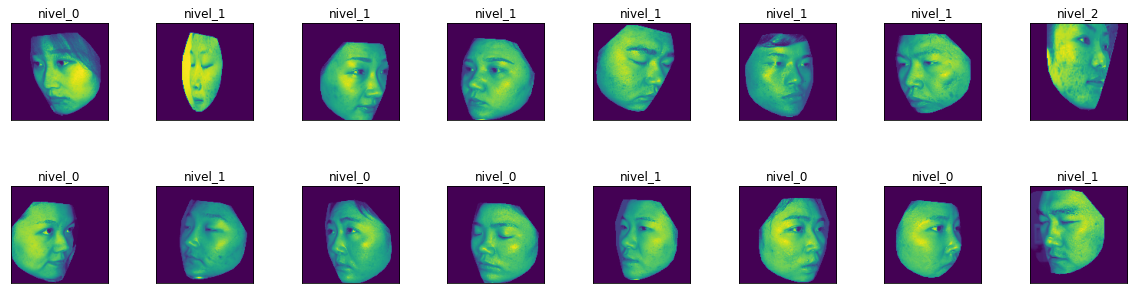

In [ ]:
plt.figure(1, figsize=(20,5))
n=0
for i in range(16):
  n += 1
  r = np.random.randint(0, imagenes.shape[0], 1)
  plt.subplot(2, 8, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.5, wspace =0.5)
  plt.imshow(imagenes[r[0]])
  plt.title('{}'.format(especie_planta(labels[r[0]]), labels[r[0]]))
  plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
p = np.random.permutation(range(len(imagenes)))
imagenes = imagenes[p]
labels = labels[p]

In [ ]:
from sklearn.model_selection import train_test_split
#split para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(imagenes, labels, test_size = 0.2, random_state = 111)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(801, 128, 128) (801,) (201, 128, 128) (201,)


In [ ]:
print("pre",X_train.shape)
X_train = X_train.reshape([-1, 128, 128, 1])
X_test = X_test.reshape([-1, 128, 128, 1])
print("resignación",X_train.shape)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print('x_train shape:', X_train.shape)
print('Numero de imagenes en x_train', X_train.shape[0], "y_train:", y_train.shape)
print('Numero de imagenes in x_test', X_test.shape[0], "y_test: ", y_test.shape)

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# print (X_train.shape, y_train_ohe.shape, X_test.shape, y_test_ohe.shape)

pre (801, 128, 128)
resignación (801, 128, 128, 1)
x_train shape: (801, 128, 128, 1)
Numero de imagenes en x_train 801 y_train: (801, 3)
Numero de imagenes in x_test 201 y_test:  (201, 3)
(801, 128, 128, 1) (801, 3) (201, 128, 128, 1) (201, 3)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.987 ):
            print("\nReached 98.7% accuracy so cancelling training!")
            self.model.stop_training = True 

In [ ]:
callbacks=myCallback()
history = model.fit(X_train,y_train, batch_size =32 , epochs=20,  validation_split = 0.2,
                    callbacks = callbacks,
                    verbose=1, shuffle=True)

Epoch 1/20
20/20 [==============================] - 20s 954ms/step - loss: 0.1692 - accuracy: 0.9312 - val_loss: 1.6356 - val_accuracy: 0.4720
Epoch 2/20
20/20 [==============================] - 18s 871ms/step - loss: 0.2024 - accuracy: 0.9297 - val_loss: 1.6179 - val_accuracy: 0.4845
Epoch 3/20
20/20 [==============================] - 17s 867ms/step - loss: 0.1301 - accuracy: 0.9672 - val_loss: 1.7481 - val_accuracy: 0.4720
Epoch 4/20
20/20 [==============================] - 17s 857ms/step - loss: 0.1149 - accuracy: 0.9656 - val_loss: 1.9028 - val_accuracy: 0.4472
Epoch 5/20
20/20 [==============================] - 18s 874ms/step - loss: 0.0871 - accuracy: 0.9766 - val_loss: 2.0081 - val_accuracy: 0.4472
Epoch 6/20
20/20 [==============================] - 17s 844ms/step - loss: 0.1009 - accuracy: 0.9703 - val_loss: 1.9756 - val_accuracy: 0.4907
Epoch 7/20
20/20 [==============================] - 17s 845ms/step - loss: 0.0711 - accuracy: 0.9797 - val_loss: 2.1016 - val_accuracy: 0.5093

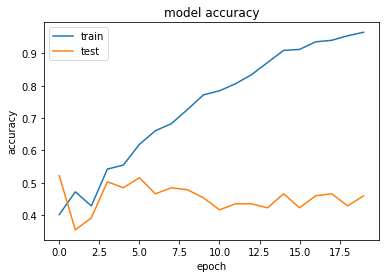

In [ ]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
     

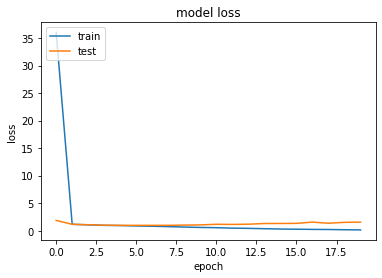

In [ ]:

plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_loss,test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 1s 199ms/step - loss: 1.7450 - accuracy: 0.4328
Test accuracy: 0.43283581733703613
